# Example with pycaret

## Setup

In [1]:
import pandas as pd

from pycaret.regression import *
import optuna
from sklearn.datasets import fetch_california_housing

In [2]:
# get data
df_raw = fetch_california_housing(as_frame=True)['frame']

df = df_raw.sample(frac=0.9, random_state=42)
df_unseen = df_raw.drop(df.index)

print(f'Data for modeling: {df.shape}')
print(f'Data for prediction: {df_unseen.shape}')

Data for modeling: (18576, 9)
Data for prediction: (2064, 9)


## Modeling

In [3]:
# set up pycaret
exp = setup(
    data = df,
    target = 'MedHouseVal', 
    session_id = 42,
    normalize = True, 
    transformation = True, transform_target = True, 
    rare_to_value = 0.05,
    remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
    bin_numeric_features = [],
    log_experiment = False, 
    experiment_name = 'california',
    verbose = False)
pull() # we use verbose=False and pull because otherwise colored tables are not visible in dark mode 

,Description,Value
0,Session id,42
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(18576, 9)"
4,Transformed data shape,"(18576, 9)"
5,Transformed train set shape,"(13003, 9)"
6,Transformed test set shape,"(5573, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [4]:
# list models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [5]:
# compare many models and save best (or top-n list)
top3 = compare_models(
    n_select = 3,
    fold = 5,
    sort = 'RMSE',
    verbose = False)
pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3343,0.2600,0.5097,0.8046,0.1500,0.1769,0.094
et,Extra Trees Regressor,0.3417,0.2796,0.5284,0.7899,0.1537,0.1801,0.880
rf,Random Forest Regressor,0.3555,0.3005,0.5479,0.7741,0.1608,0.1900,1.756
gbr,Gradient Boosting Regressor,0.3826,0.3195,0.5650,0.7598,0.1660,0.2028,0.716
knn,K Neighbors Regressor,0.4197,0.3851,0.6203,0.7105,0.1863,0.2285,0.102
huber,Huber Regressor,0.4602,0.4328,0.6577,0.6747,0.1992,0.2516,0.062
lr,Linear Regression,0.4658,0.4385,0.6619,0.6705,0.1992,0.2559,0.706
lar,Least Angle Regression,0.4658,0.4385,0.6619,0.6705,0.1992,0.2559,0.040
br,Bayesian Ridge,0.4658,0.4385,0.6620,0.6704,0.1992,0.2559,0.032
ridge,Ridge Regression,0.4658,0.4385,0.6620,0.6704,0.1992,0.2559,0.038


## Single model

In [7]:
# create a single decision tree
dt = create_model('dt', fold=5, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5092,0.5850,0.7649,0.5535,0.2290,0.2782
1,0.5080,0.6128,0.7828,0.5366,0.2327,0.2770
2,0.5036,0.5953,0.7716,0.5618,0.2307,0.2813
3,0.4939,0.5724,0.7566,0.5663,0.2255,0.2688
4,0.5039,0.5745,0.7580,0.5723,0.2253,0.2637
Mean,0.5037,0.5880,0.7667,0.5581,0.2286,0.2738
Std,0.0054,0.0148,0.0096,0.0124,0.0029,0.0065


In [8]:
# tune the model hyperparameters
tuned_dt = tune_model(dt, n_iter=20, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4434,0.4220,0.6496,0.6737,0.1969,0.2499
1,0.4724,0.4875,0.6982,0.6327,0.2119,0.2617
2,0.4393,0.4357,0.6600,0.6604,0.1960,0.2352
3,0.4647,0.4645,0.6815,0.6587,0.2057,0.2624
4,0.4486,0.4298,0.6556,0.6868,0.2011,0.2556
5,0.4514,0.4214,0.6492,0.6866,0.2009,0.2578
6,0.4398,0.4111,0.6412,0.6908,0.1959,0.2410
7,0.4215,0.3820,0.6180,0.7083,0.1894,0.2357
8,0.4429,0.4198,0.6479,0.6928,0.1933,0.2374


In [9]:
# bagging
bagged_dt = ensemble_model(tuned_dt, method='Bagging', n_estimators=50, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3953,0.3481,0.5900,0.7309,0.1780,0.2252
1,0.4102,0.3824,0.6184,0.7118,0.1816,0.2220
2,0.4043,0.3847,0.6202,0.7002,0.1815,0.2193
3,0.4126,0.3850,0.6205,0.7171,0.1813,0.2234
4,0.3956,0.3425,0.5852,0.7505,0.1767,0.2204
5,0.3954,0.3333,0.5773,0.7522,0.1738,0.2206
6,0.3959,0.3422,0.5850,0.7426,0.1740,0.2137
7,0.3690,0.3104,0.5572,0.7629,0.1652,0.2017
8,0.4062,0.3556,0.5964,0.7397,0.1748,0.2117


In [10]:
# bagging
boosted_dt = ensemble_model(tuned_dt, method='Boosting', n_estimators=50, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4022,0.3249,0.5700,0.7487,0.1679,0.2278
1,0.4034,0.3389,0.5822,0.7446,0.1684,0.2159
2,0.4128,0.3533,0.5944,0.7246,0.1711,0.2230
3,0.4208,0.3662,0.6051,0.7310,0.1747,0.2313
4,0.4007,0.3140,0.5603,0.7712,0.1651,0.2228
5,0.3997,0.3105,0.5572,0.7691,0.1660,0.2260
6,0.4000,0.3181,0.5640,0.7608,0.1659,0.2183
7,0.3893,0.3066,0.5537,0.7659,0.1618,0.2167
8,0.4108,0.3374,0.5808,0.7531,0.1657,0.2119


## Stacking

In [11]:
# for model in top3:
#     tmp = tune_model(m, verbose=False)
#     pull()

# top3 = tmp

LGBMRegressor(random_state=42)
ExtraTreesRegressor(n_jobs=-1, random_state=42)
RandomForestRegressor(n_jobs=-1, random_state=42)


In [17]:
# blending (average of predictions)
blender = blend_models(estimator_list = top3, verbose = False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3239,0.2537,0.5037,0.8039,0.1504,0.1814
1,0.3380,0.2775,0.5268,0.7909,0.1517,0.1747
2,0.3498,0.3000,0.5477,0.7662,0.1575,0.1851
3,0.3538,0.3035,0.5509,0.7770,0.1600,0.1888
4,0.3346,0.2589,0.5088,0.8114,0.1510,0.1810
5,0.3326,0.2605,0.5104,0.8063,0.1516,0.1821
6,0.3227,0.2534,0.5033,0.8095,0.1463,0.1683
7,0.3119,0.2412,0.4911,0.8158,0.1431,0.1655
8,0.3356,0.2634,0.5132,0.8073,0.1481,0.1687


In [13]:
stacker = stack_models(top3, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3138,0.2313,0.4809,0.8211,0.1445,0.1741
1,0.3242,0.2490,0.4990,0.8124,0.1453,0.1667
2,0.3426,0.2838,0.5327,0.7788,0.1538,0.1790
3,0.3447,0.2865,0.5353,0.7895,0.1559,0.1834
4,0.3281,0.2461,0.4961,0.8207,0.1474,0.1751
5,0.3235,0.2489,0.4989,0.8149,0.1481,0.1744
6,0.3101,0.2353,0.4851,0.8231,0.1420,0.1621
7,0.3066,0.2294,0.4790,0.8248,0.1402,0.1627
8,0.3240,0.2420,0.4919,0.8229,0.1431,0.1619


In [15]:
meta = create_model('lightgbm', verbose=False)
stacker2 = stack_models(top3, meta_model=meta, verbose=False)
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3073,0.2275,0.4770,0.8241,0.1434,0.1707
1,0.3190,0.2470,0.4970,0.8139,0.1451,0.1649
2,0.3348,0.2690,0.5186,0.7904,0.1507,0.1755
3,0.3413,0.2816,0.5307,0.7931,0.1550,0.1816
4,0.3238,0.2425,0.4924,0.8233,0.1471,0.1735
5,0.3224,0.2459,0.4958,0.8172,0.1477,0.1736
6,0.3064,0.2307,0.4803,0.8265,0.1407,0.1600
7,0.3040,0.2308,0.4805,0.8237,0.1400,0.1604
8,0.3262,0.2466,0.4966,0.8196,0.1446,0.1633


In [18]:
# prediction on test set
for model in [stacker2, stacker, blender] + top3:
    predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.0674,0.0090,0.0951,0.8469,0.0517,0.0862


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.0682,0.0092,0.0957,0.8452,0.0519,0.0871


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0707,0.0097,0.0984,0.8363,0.0534,0.0908


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0712,0.0098,0.0988,0.8348,0.0538,0.0913


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0710,0.0099,0.0993,0.8334,0.0537,0.0909


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0751,0.0109,0.1046,0.8149,0.0566,0.0963


## Result analys

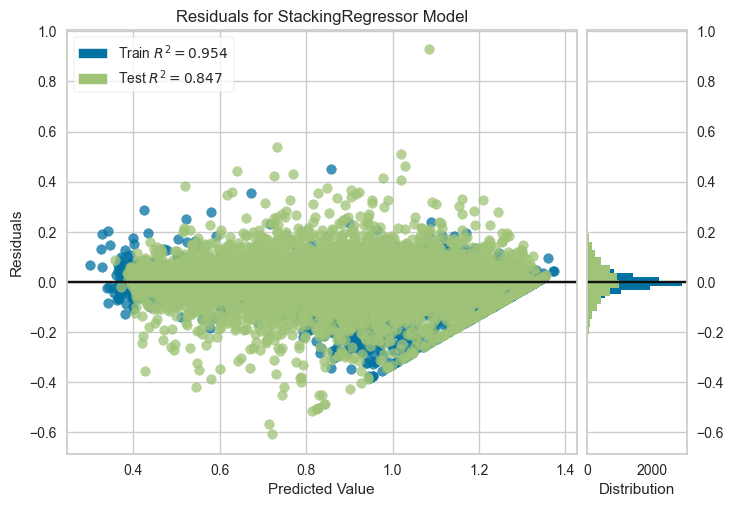

In [19]:
plot_model(stacker2)
# or evaluate_model() which opens an interactive window

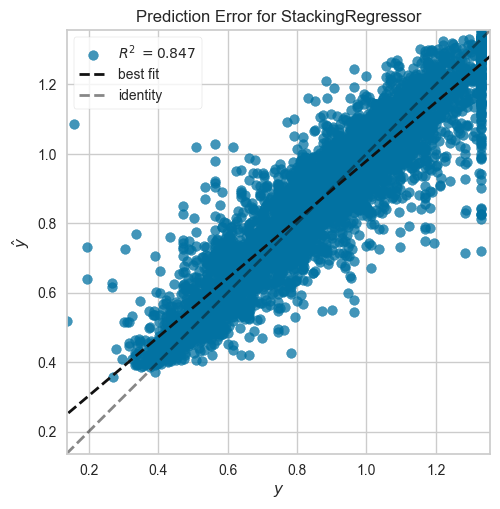

In [20]:
plot_model(stacker2, 'error')

In [22]:
# plot_model(stacker2, 'feature')

In [23]:
plot_model(stacker2, 'parameter')

,Parameters
cv,5
estimators,"[('Light Gradient Boosting Machine', LGBMRegre..."
final_estimator,LGBMRegressor(random_state=42)
n_jobs,-1
passthrough,True
verbose,0


## Finalize and predict

In [24]:
# train final model on train + test data
final_model = finalize_model(stacker2) 

In [25]:
preds_unseen = predict_model(final_model, data=df_unseen)
preds_unseen.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.0692,0.0097,0.0984,0.8388,0.0531,0.0869


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction_label
0,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.840000,-122.250000,2.611,1.074766
1,3.2705,52.0,4.772480,1.024523,1504.0,2.049046,37.849998,-122.260002,2.418,1.002429
2,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.840000,-122.260002,1.913,0.947856
3,1.4113,52.0,4.295455,1.104545,576.0,2.618182,37.820000,-122.279999,0.831,0.626265
4,3.3929,52.0,5.994652,1.128342,554.0,2.962567,37.830002,-122.290001,0.757,0.931228


## Save and reload

In [26]:
save_model(final_model, 'model011023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\alepi\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                              'AveBedrms', 'Population',
                                              'AveOccup', 'Latitude',
                                              'Longitu...
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator',
                  StackingRegressor(cv=5,
                                    estimators=[('Light Gradient Boosting '
                                                 'Machine',
                                                 LGBMRegressor(random_state=42)),
                                                ('Ext

In [27]:
m = load_model('model011023')
predict_model(m, data=df_unseen).head()

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.0692,0.0097,0.0984,0.8388,0.0531,0.0869


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction_label
0,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.840000,-122.250000,2.611,1.074766
1,3.2705,52.0,4.772480,1.024523,1504.0,2.049046,37.849998,-122.260002,2.418,1.002429
2,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.840000,-122.260002,1.913,0.947856
3,1.4113,52.0,4.295455,1.104545,576.0,2.618182,37.820000,-122.279999,0.831,0.626265
4,3.3929,52.0,5.994652,1.128342,554.0,2.962567,37.830002,-122.290001,0.757,0.931228
